In [97]:
#pip install nltk matplotlib


**Importación de librerias**

In [98]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import gutenberg, stopwords

nltk.download('gutenberg')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [99]:
# Elige un texto del corpus, por ejemplo, 'austen-emma.txt'
texto = nltk.corpus.gutenberg.raw('shakespeare-hamlet.txt')

Tokenización y Frecuencia de Palabras

Se llevará a cabo la tokenización del texto y se calculará la frecuencia de palabras. Además, se eliminarán las palabras vacías (stop words) para un análisis más preciso:


In [100]:
# Tokenización
tokens = word_tokenize(texto)



In [101]:
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]




In [102]:
# Cálculo de la frecuencia de palabras
frecuencia_palabras = nltk.FreqDist(tokens)


In [103]:
# Obtener las 20 palabras más comunes
palabras_comunes = frecuencia_palabras.most_common(20)
palabras, frecuencias = zip(*palabras_comunes)



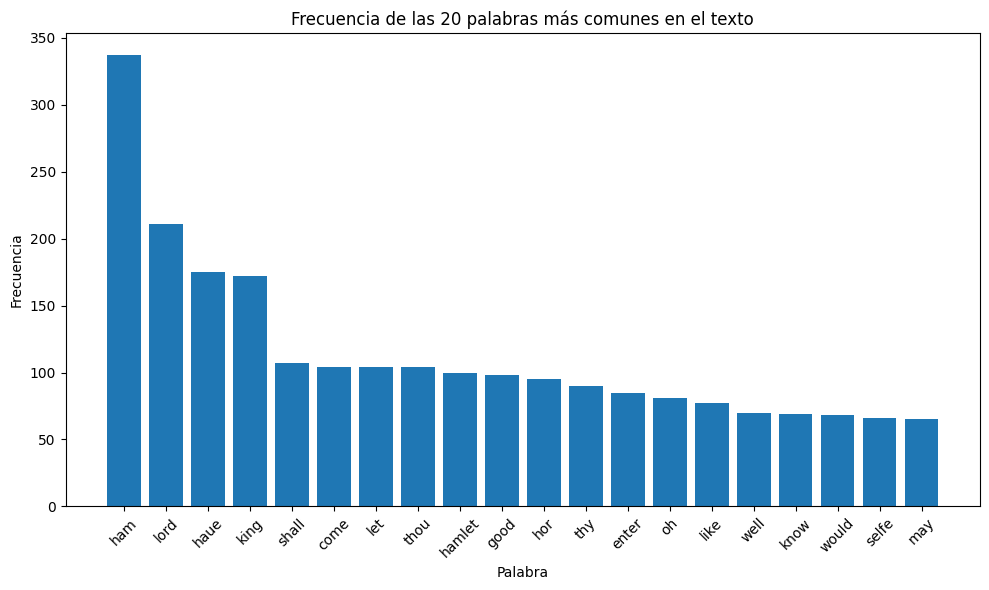

In [104]:
# Visualización de las palabras más comunes
plt.figure(figsize=(10, 6))
plt.bar(palabras, frecuencias)
plt.title('Frecuencia de las 20 palabras más comunes en el texto')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Se muestra un diagrama de barras que contiene la distribución de frecuencia de los datos. Para este caso las 20 primeras palabras mas comunes, para este caso en la distribución de frecuencias de palabras en el texto, se utilizan principalmente dos bibliotecas: NLTK (Natural Language Toolkit) y Matplotlib. NLTK proporciona una amplia gama de herramientas y recursos para el procesamiento del lenguaje natural en Python, incluyendo funciones para tokenizar texto, calcular la frecuencia de palabras y eliminar palabras vacías (stop words). Matplotlib es una biblioteca de visualización que nos permite crear gráficos de barras, como el utilizado en este caso para mostrar las palabras más comunes y sus frecuencias. Juntas, estas bibliotecas proporcionan las herramientas necesarias para analizar la distribución de frecuencias de palabras en un texto y visualizar los resultados de manera efectiva.
Las stop words (palabras vacías) son palabras comunes que suelen eliminarse del texto durante el procesamiento del lenguaje natural debido a que no aportan un significado importante para el análisis. Estas palabras son muy frecuentes en un idioma dado, pero por lo general carecen de información semántica útil. Ejemplos de stop words en inglés incluyen "the", "is", "and", "are", "in", "to", entre otras.
La eliminación de stop words es una técnica común en el preprocesamiento de texto, ya que ayuda a reducir el ruido y el tamaño del vocabulario, lo que a su vez puede mejorar la precisión de ciertas tareas de procesamiento del lenguaje natural, como la clasificación de textos o la recuperación de información. Sin embargo, la lista de stop words puede variar dependiendo del contexto y del objetivo del análisis.

Estadísticas en Textos

Se calcularán algunas estadísticas básicas sobre el texto, como la longitud promedio de las palabras y la diversidad léxica:



In [105]:
# Longitud promedio de las palabras
longitudes_palabras = [len(word) for word in tokens]
longitud_promedio = sum(longitudes_palabras) / len(longitudes_palabras)
print('Longitud promedio de las palabras:', longitud_promedio)


Longitud promedio de las palabras: 5.302612764851164


In [106]:
# Diversidad léxica
diversidad_lexica = len(set(tokens)) / len(tokens)
print('Diversidad léxica:', diversidad_lexica)


Diversidad léxica: 0.28941895229429354


Las estadísticas mas comunes de esto son:
Longitud promedio de las palabras:
Longitud promedio de las palabras=

Diversidad léxica:
Diversidad léxica = V/n
donde:
n es el número total de palabras en el texto.
longitud(wi​) es la longitud de la palabra wiwi​.
V es el número de palabras únicas en el texto.
El anterior scripts, imprimirá lo siguiente:
Longitud promedio de las palabras: 5.302612764851164
Diversidad léxica: 0.28941895229429354
Otro análisis exclusivo usando textos es el de identificación de genero, a continuación se usa la base de datos del titanic,con dicho ejemplo.


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
#!pip install spacy
#!python -m spacy download es_core_news_sm



In [108]:
# Cargar el modelo en español de spaCy
nlp = spacy.load("es_core_news_sm")


In [109]:
# Cargar los datos del Titanic
train_data = pd.read_csv("/content/titanic_train.xls")
test_data = pd.read_csv("/content/test.csv")


In [110]:
# Combinar los datos de entrenamiento y prueba
all_data = pd.concat([train_data, test_data], ignore_index=True)


In [111]:
# Función para determinar el género y la edad aproximada
def categorize_gender_age(name):
    name = name.lower()
    if 'mr.' in name:
        return 'Hombre'
    elif 'mrs.' in name or 'miss.' in name:
        return 'Mujer'
    elif 'master.' in name or 'boy' in name or 'baby' in name:
        return 'Niño'
    return 'Desconocido'



In [112]:
# Aplicar la función a cada fila
all_data['Gender_Age_Category'] = all_data['Name'].apply(categorize_gender_age)


In [113]:
# Contar la cantidad de sobrevivientes por categoría de género y edad
survivors_count = all_data[all_data['Survived'] == 1]['Gender_Age_Category'].value_counts()

<ipython-input-114-51e86fdad149>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender_Age_Category', data=all_data[all_data['Survived'] == 1], palette='pastel')


<Axes: xlabel='Gender_Age_Category', ylabel='count'>

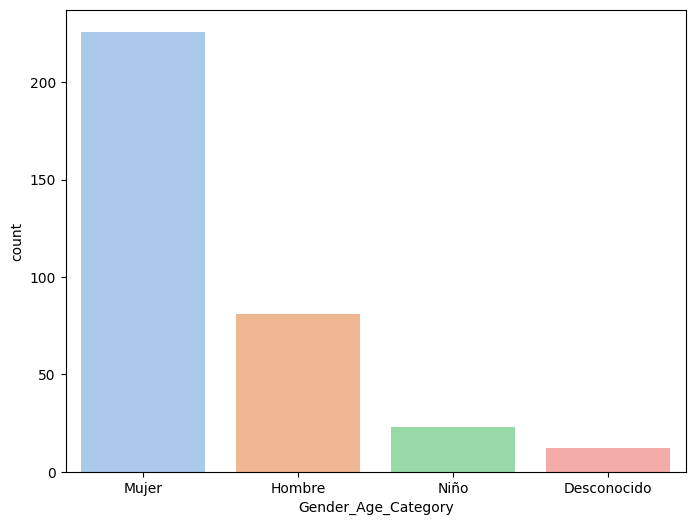

In [114]:
# Visualización de la cantidad de sobrevivientes por género y edad
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender_Age_Category', data=all_data[all_data['Survived'] == 1], palette='pastel')


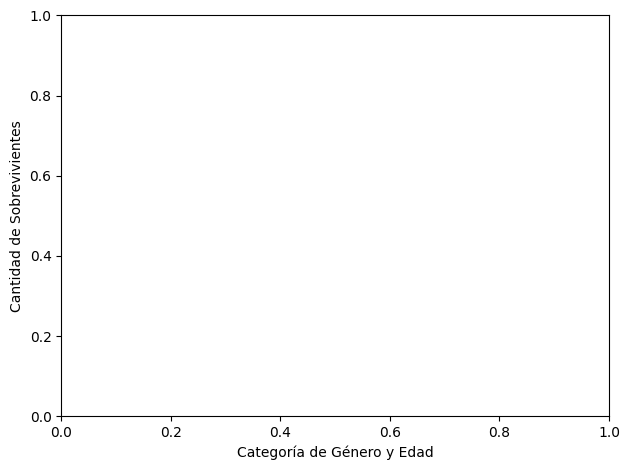

In [115]:
#plt.title('Cantidad de Sobrevivientes por Género y Edad')
plt.xlabel('Categoría de Género y Edad')
plt.ylabel('Cantidad de Sobrevivientes')
plt.tight_layout()
plt.show()


In [116]:
# Imprimir los resultados
print("Cantidad de Sobrevivientes por Género y Edad:")
print(survivors_count)


Cantidad de Sobrevivientes por Género y Edad:
Gender_Age_Category
Mujer          226
Hombre          81
Niño            23
Desconocido     12
Name: count, dtype: int64


Para complementar el análisis de los datos del Titanic, se aplicaron técnicas básicas de Procesamiento del Lenguaje Natural (NLP) para extraer información útil de los nombres de los pasajeros. Primero, se definió una función que busca palabras clave en los nombres, como "Mr.", "Mrs.", "Miss.", "Master.", "Boy" y "Baby", para determinar el género y la edad aproximada de cada pasajero. Estas palabras clave se utilizaron como indicadores para clasificar a los pasajeros en categorías de género y edad: Hombre, Mujer y Niño. Luego, se aplicó esta función a cada nombre en el conjunto de datos para asignar una categoría de género y edad a cada pasajero. Esto permitió realizar un análisis más detallado de la distribución de los sobrevivientes en función de su género y edad. (Ver siguiente figura)


Esta representa la cantidad de sobrevivientes para un conjunto de datos del titanic, con las palabras reservadas según el dataset, se identificaron la frecuencia de dichos datos.
